*GRAFICO IDEAL DEL ROBOT CUADRUPEDO CON SECUENCIA DE POSICIONES*

In [ ]:
!pip install sympy
!pip install matplotlib
import sympy as sp
import math
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


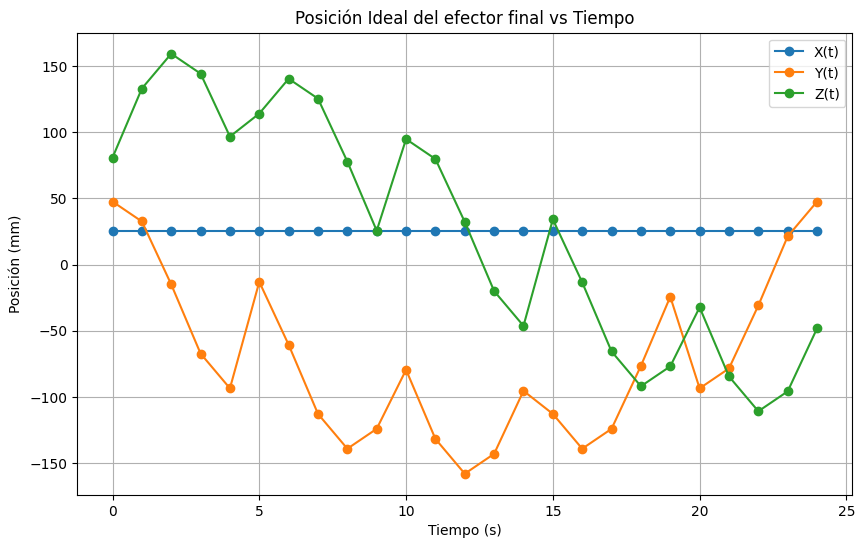

In [11]:
q1, q2, q3, l1, l2, l3 = sp.symbols("q1 q2 q3 l1 l2 l3", real=True)

def rotationX(q):
    return sp.Matrix([
        [1, 0, 0],
        [0, sp.cos(q), -sp.sin(q)],
        [0, sp.sin(q), sp.cos(q)]
    ])

def rotationY(q):
    return sp.Matrix([
        [sp.cos(q), 0, sp.sin(q)],
        [0, 1, 0],
        [-sp.sin(q), 0, sp.cos(q)]
    ])

def rotationZ(q):
    return sp.Matrix([
        [sp.cos(q), -sp.sin(q), 0],
        [sp.sin(q),  sp.cos(q), 0],
        [0, 0, 1]
    ])

def vector(x, y, z):
    return sp.Matrix([[x],[y],[z]])

def T(C, vec):
    return C.row_join(vec).col_join(sp.Matrix([[0, 0, 0, 1]]))

# Cinemática directa simbólica
CI0 = rotationZ(q1)
C01 = rotationX(q2)
C12 = rotationX(-q3)
C2F = sp.eye(3)

rI0 = vector(0, 0, 0)
r01 = vector(17.66, -22.93, 24.25)
r12 = vector(6.9, -64.49, 0)
r2F = vector(0.5, -70.54, 7.96)

TI0 = T(CI0, rI0)
T01 = T(C01, r01)
T12 = T(C12, r12)
T2F = T(C2F, r2F)

TIF = sp.simplify(TI0*T01*T12*T2F)
rIF = TIF[:3, 3]

# Función de cinemática directa (q1_deg, q2_deg, q3_deg en grados)
def forwardKinematics(q1_deg, q2_deg, q3_deg):
    q1_rad = math.radians(q1_deg)
    q2_rad = math.radians(q2_deg)
    q3_rad = math.radians(q3_deg)
    
    variable = {
        q1: q1_rad,
        q2: q2_rad,
        q3: q3_rad
    }
    
    r_val = rIF.subs(variable).evalf()
    x = float(r_val[0])
    y = float(r_val[1])
    z = float(r_val[2])
    return x, y, z

# Secuencia con incrementos de 45°:
sequence = [
    (0, -90, 90),
    (0, -90, 45),
    (0, -90, 0),
    (0, -90, -45),
    (0, -90, -90),
    (0, -45, 90),
    (0, -45, 45),
    (0, -45, 0),
    (0, -45, -45),
    (0, -45, -90),
    (0, 0, 90),
    (0, 0, 45),
    (0, 0, 0),
    (0, 0, -45),
    (0, 0, -90),
    (0, 45, 90),
    (0, 45, 45),
    (0, 45, 0),
    (0, 45, -45),
    (0, 45, -90),
    (0, 90, 90),
    (0, 90, 45),
    (0, 90, 0),
    (0, 90, -45),
    (0, 90, -90),
]

t_data = []
x_data = []
y_data = []
z_data = []

time_step = 1.0
current_time = 0.0

for (q1_deg, q2_deg, q3_deg) in sequence:
    x, y, z = forwardKinematics(q1_deg, q2_deg, q3_deg)
    t_data.append(current_time)
    x_data.append(x)
    y_data.append(y)
    z_data.append(z)
    current_time += time_step

plt.figure(figsize=(10, 6))
plt.plot(t_data, x_data, marker='o', label='X(t)')
plt.plot(t_data, y_data, marker='o', label='Y(t)')
plt.plot(t_data, z_data, marker='o', label='Z(t)')

plt.title('Posición Ideal del efector final vs Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (mm)')
plt.grid(True)
plt.legend()
plt.show()

*GRAFICO IDEAL VS REAL DEL ROBOT CUADRUPEDO CON ESTUDIO DE CASOS*

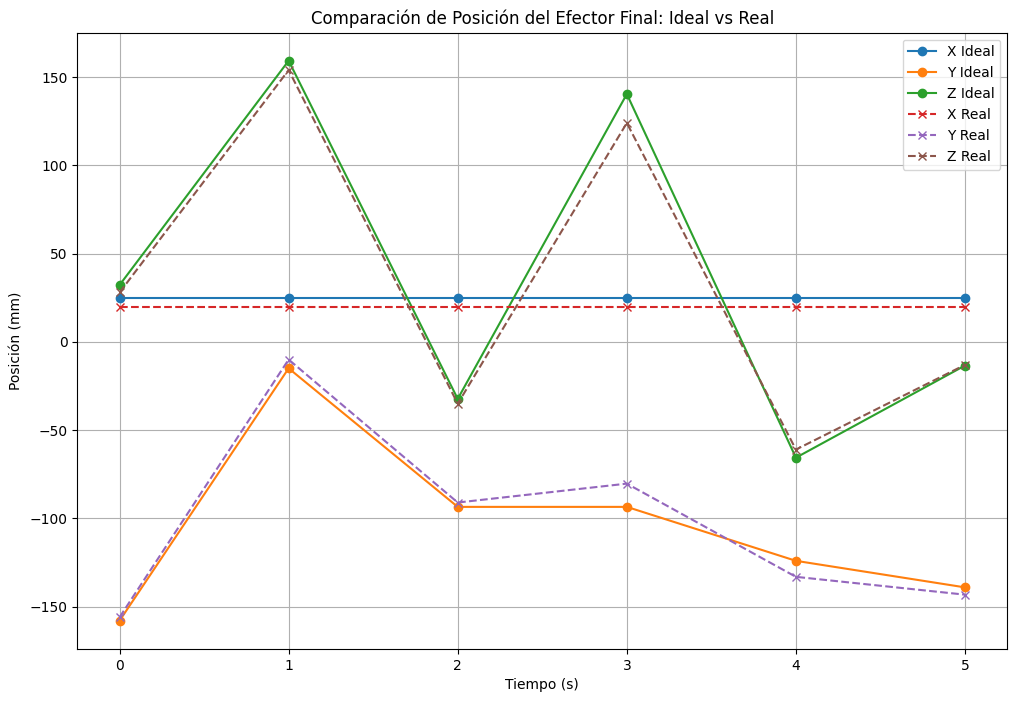

In [ ]:
# Valores ideales
t_data_ideal = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
x_data_ideal = [25.06, 25.06, 25.06, 25.06, 25.06, 25.06]
y_data_ideal = [-157.96, -14.97, -93.47, -93.47, -124.03, -139.07]
z_data_ideal = [32.21, 159.28, -32.28, 140.39, -65.60,-13.39]


# Valores reales
t_data_real = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
x_data_real = [20, 20, 20, 20, 20, 20]  # Valores de X  
y_data_real = [-156, -10, -91, -80.3, -133.1, -143.2]  # Valores de Y
z_data_real = [28, 154, -35, 124, -61, -13]  # Valores de Z

# Verificar que las listas tienen la misma longitud
if not (len(t_data_ideal) == len(x_data_ideal) == len(y_data_ideal) == len(z_data_ideal)):
    raise ValueError("Las listas ideales t_data, x_data, y_data y z_data deben tener la misma longitud.")

if not (len(t_data_real) == len(x_data_real) == len(y_data_real) == len(z_data_real)):
    raise ValueError("Las listas reales t_data, x_data, y_data y z_data deben tener la misma longitud.")

# Graficar los datos ideales y reales
plt.figure(figsize=(12, 8))

# Gráfica ideal
plt.plot(t_data_ideal, x_data_ideal, marker='o', label='X Ideal')
plt.plot(t_data_ideal, y_data_ideal, marker='o', label='Y Ideal')
plt.plot(t_data_ideal, z_data_ideal, marker='o', label='Z Ideal')


# Gráfica real
plt.plot(t_data_real, x_data_real, marker='x', linestyle='--', label='X Real')
plt.plot(t_data_real, y_data_real, marker='x', linestyle='--', label='Y Real')
plt.plot(t_data_real, z_data_real, marker='x', linestyle='--', label='Z Real')

# Configuración de la gráfica
plt.title('Comparación de Posición del Efector Final: Ideal vs Real')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (mm)')
plt.grid(True)
plt.legend()
plt.show()


*TABLA COMPARATIVA DE POSICION IDEAL VS REAL DEL ROBOT CUADRUPEDO CON ESTUDIO DE CASOS*

In [10]:
t_data_ideal = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
x_data_ideal = [25.06, 25.06, 25.06, 25.06, 25.06, 25.06]
y_data_ideal = [-157.96, -14.97, -93.47, -93.47, -124.03, -139.07]
z_data_ideal = [32.21, 159.28, -32.28, 140.39, -65.60, -13.39]

t_data_real = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
x_data_real = [20, 20, 20, 20, 20, 20]
y_data_real = [-156, -10, -91, -80.3, -133.1, -143.2]
z_data_real = [28, 154, -35, 124, -61, -13]

data = {
    "Tiempo (s)": t_data_ideal,
    "X Ideal": x_data_ideal,
    "X Real": x_data_real,
    "Y Ideal": y_data_ideal,
    "Y Real": y_data_real,
    "Z Ideal": z_data_ideal,
    "Z Real": z_data_real,
}

df = pd.DataFrame(data)

print("\nTabla de datos:")
print(df.to_string(index=False))



Tabla de datos:
 Tiempo (s)  X Ideal  X Real  Y Ideal  Y Real  Z Ideal  Z Real
        0.0    25.06      20  -157.96  -156.0    32.21      28
        1.0    25.06      20   -14.97   -10.0   159.28     154
        2.0    25.06      20   -93.47   -91.0   -32.28     -35
        3.0    25.06      20   -93.47   -80.3   140.39     124
        4.0    25.06      20  -124.03  -133.1   -65.60     -61
        5.0    25.06      20  -139.07  -143.2   -13.39     -13
